In [1]:
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import fem_schrodinger_1d
import importlib

importlib.reload(fem_schrodinger_1d)
from fem_schrodinger_1d import *

In [2]:
m_e = 9.10938356e-31
omega = 1e14
xs = np.linspace(-1e-8, 1e-8, 100)
vs = 1 / 2 * m_e * omega**2 * xs**2

In [3]:
fem = FemSchrodinger(xs[-1] - xs[0], vs)

In [4]:
A = fem.assemble_matrix_A()
B = fem.assemble_matrix_B()

In [5]:
A_prime = A[1:-1, 1:-1]
B_prime = B[1:-1, 1:-1]

In [14]:
val, vec = eigsh(A_prime, 10, M=B_prime, which="LA", sigma=0)

In [15]:
np.linalg.norm(vec)

226835.98193616112

In [37]:
vec.shape

(99, 10)

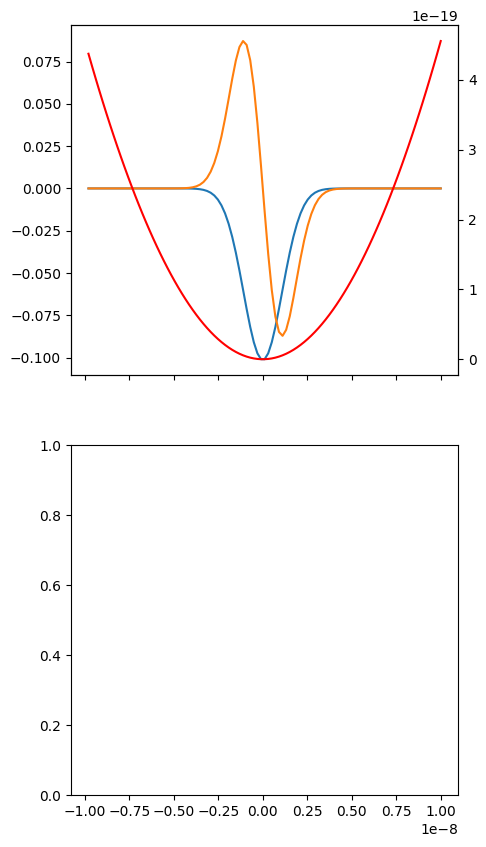

In [40]:
vec = vec / np.linalg.norm(vec)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 10))
ax[0].plot(xs[1:], vec[:, 0:2].real)
ax2 = ax[0].twinx()
ax2.plot(xs[1:], vs[1:], color="red")
ax[0].plot(xs[1:], vec[:, 2:4].real)
ax2 = ax[0].twinx()
ax2.plot(xs[1:], vs[1:], color="red")

In [9]:
electron_volt = 1.602176634e-19

In [10]:
val / electron_volt

array([0.03350875, 0.1002836 ])

In [11]:
hbar = 1.0545718e-34
hbar * omega * 3 / 2 / electron_volt

0.09873179189055632